In [58]:
# %load functions.ipynb
{
 "cells": [
  {
   "cell_type": "code",
   "execution_count": 1,
   "metadata": {},
   "outputs": [],
   "source": [
    "import matplotlib.pyplot as plt\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 2,
   "metadata": {},
   "outputs": [],
   "source": [
    "import pandas as pd\n",
    "from pandas.plotting import register_matplotlib_converters"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [],
   "source": [
    "def choose_grid(nr):\n",
    "    return nr // 4 + 1, 4"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 4,
   "metadata": {},
   "outputs": [],
   "source": [
    "def line_chart(ax: plt.Axes, series: pd.Series, title: str, xlabel: str, ylabel: str, percentage=False):\n",
    "    ax.set_title(title)\n",
    "    ax.set_xlabel(xlabel)\n",
    "    ax.set_ylabel(ylabel)\n",
    "    if percentage:\n",
    "        ax.set_ylim(0.0, 1.0)\n",
    "    ax.plot(series)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 5,
   "metadata": {},
   "outputs": [],
   "source": [
    "def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):\n",
    "    legend: list = []\n",
    "    ax.set_title(title)\n",
    "    ax.set_xlabel(xlabel)\n",
    "    ax.set_ylabel(ylabel)\n",
    "    if percentage:\n",
    "        ax.set_ylim(0.0, 1.0)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 6,
   "metadata": {},
   "outputs": [],
   "source": [
    "def bar_chart(ax: plt.Axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):\n",
    "    ax.set_title(title)\n",
    "    ax.set_xlabel(xlabel)\n",
    "    ax.set_ylabel(ylabel)\n",
    "    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')\n",
    "    if percentage:\n",
    "        ax.set_ylim(0.0, 1.0)\n",
    "    ax.bar(xvalues, yvalues, edgecolor='grey')\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 8,
   "metadata": {},
   "outputs": [],
   "source": [
    "import numpy as np\n",
    "\n",
    "def multiple_bar_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):\n",
    "\n",
    "    ax.set_title(title)\n",
    "    ax.set_xlabel(xlabel)\n",
    "    ax.set_ylabel(ylabel)\n",
    "    x = np.arange(len(xvalues))  # the label locations\n",
    "    ax.set_xticks(x)\n",
    "    ax.set_xticklabels(xvalues, fontsize='small')\n",
    "    if percentage:\n",
    "        ax.set_ylim(0.0, 1.0)\n",
    "    width = 0.8  # the width of the bars\n",
    "    step = width / len(yvalues)\n",
    "    k = 0\n",
    "    for name, y in yvalues.items():\n",
    "        ax.bar(x + k * step, y, step, label=name)\n",
    "        k += 1\n",
    "    ax.legend(loc='lower center', ncol=len(yvalues), bbox_to_anchor=(0.5, -0.2), fancybox = True, shadow = True)    \n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "outputs": [],
   "source": []
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.7.3"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 2
}


NameError: name 'null' is not defined

In [59]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('../../data/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
data.shape

(200, 11)

In [60]:
data.dtypes

pH                float64
Oxygen            float64
Chloride          float64
Nitrates          float64
Ammonium          float64
Orthophosphate    float64
Phosphate         float64
Chlorophyll       float64
fluid_velocity     object
river_depth        object
season             object
dtype: object

In [61]:
cat_vars = data.select_dtypes(include='object')
for att in cat_vars:
    print(att, data[att].unique())

fluid_velocity ['medium' 'high' 'low']
river_depth ['low' 'medium' 'high']
season ['autumn' 'winter' 'spring' 'summer']


In [39]:
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
data.dtypes


pH                 float64
Oxygen             float64
Chloride           float64
Nitrates           float64
Ammonium           float64
Orthophosphate     float64
Phosphate          float64
Chlorophyll        float64
fluid_velocity    category
river_depth       category
season            category
dtype: object

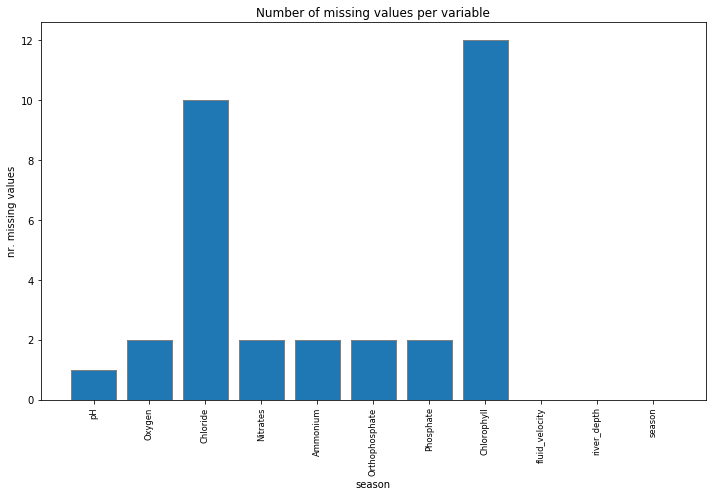

In [40]:
def bar_chart(ax: plt.Axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.bar(xvalues, yvalues, edgecolor='grey')


fig = plt.figure(figsize=(10,7))
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()    
    bar_chart(plt.gca(), mv.keys(), mv.values(), 'Number of missing values per variable', var, 'nr. missing values')
fig.tight_layout()
plt.show()

In [41]:
data.describe()

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011
std,0.598302,2.391253,46.830993,3.776458,180.011207,116.783165,102.214088,20.448323
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000
25%,7.700000,7.725000,10.985000,1.297500,35.625000,16.000000,19.395000,2.000000
50%,8.060000,9.800000,32.730000,2.675000,99.665000,41.400000,84.500000,5.200000
75%,8.400000,10.800000,57.825000,4.447500,203.730000,102.247500,182.160000,18.300000
max,9.700000,13.400000,391.500000,45.650000,931.830000,771.600000,558.750000,110.460000


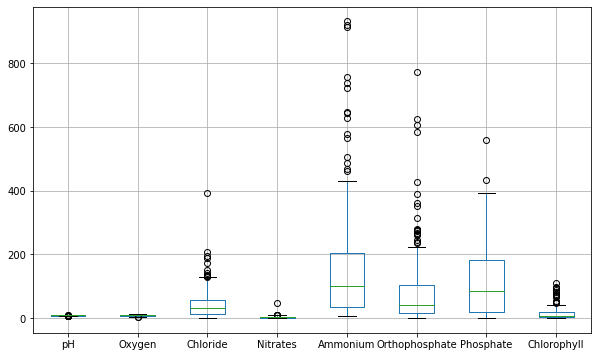

In [42]:
data.boxplot(figsize=(10,6))
plt.show() 

<Figure size 432x288 with 0 Axes>

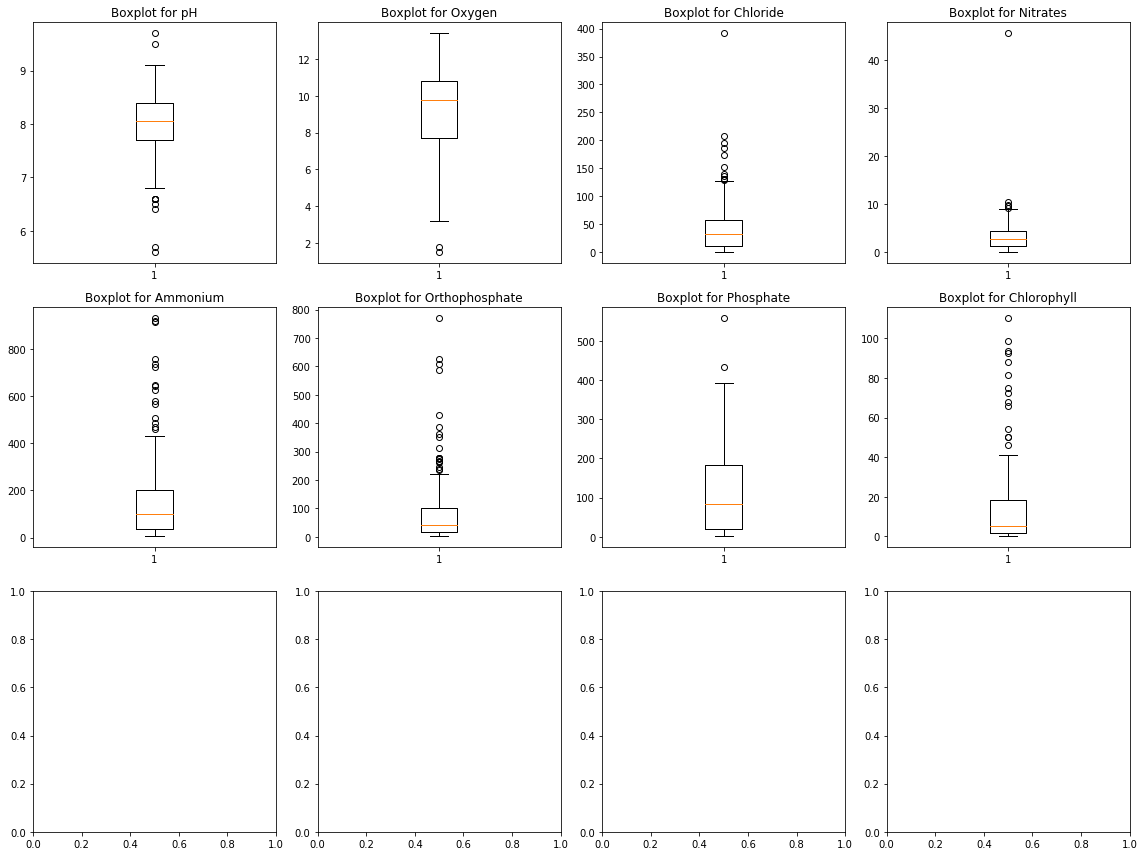

In [43]:
def choose_grid(nr):
    return nr // 4 + 1, 4

columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Boxplot for %s'%columns[n])
    axs[i, j].boxplot(data[columns[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

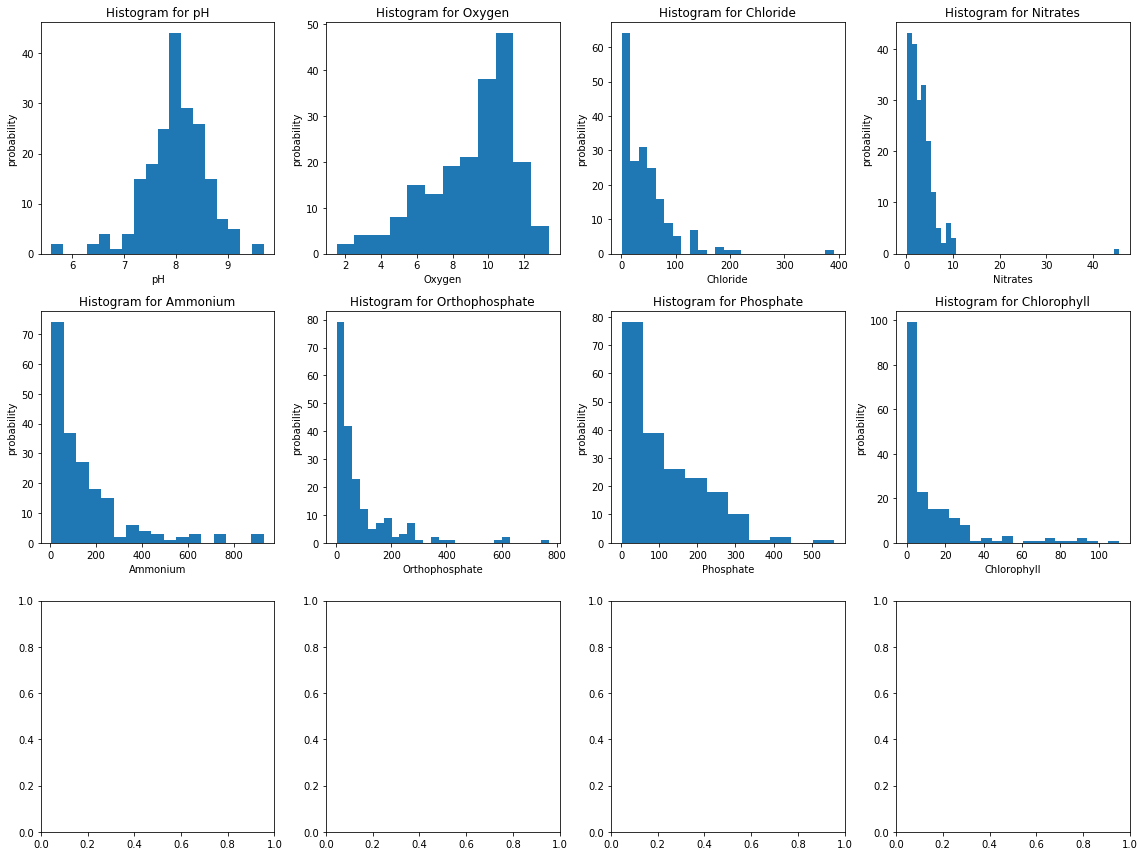

In [44]:
columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(data[columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

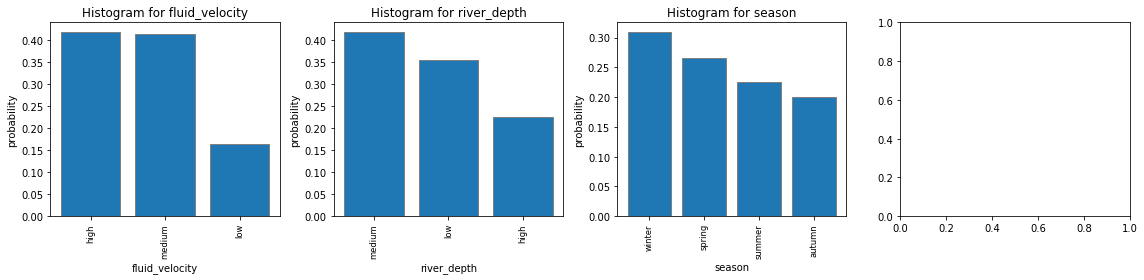

In [45]:
columns = data.select_dtypes(include='category').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data[columns[n]].dropna().value_counts(normalize=True)
    bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

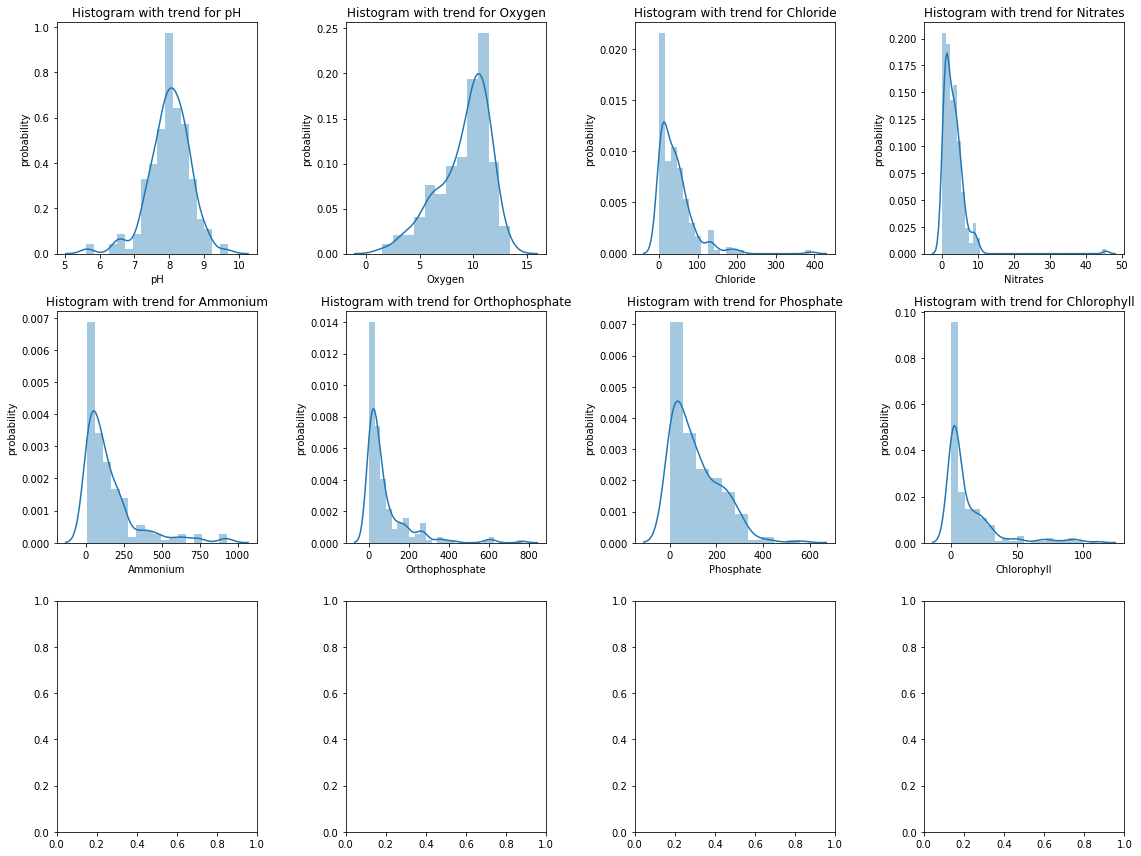

In [46]:
import seaborn as sns

columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(data[columns[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

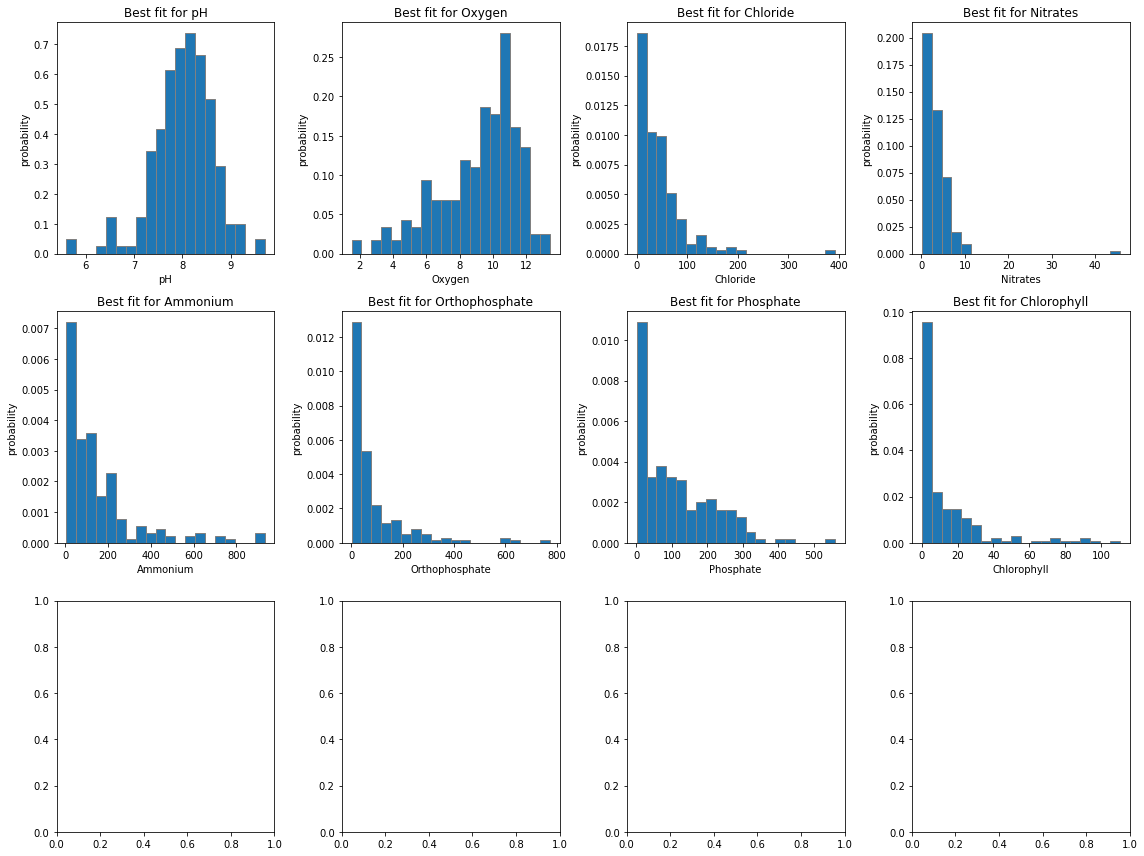

In [47]:
def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = data.select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

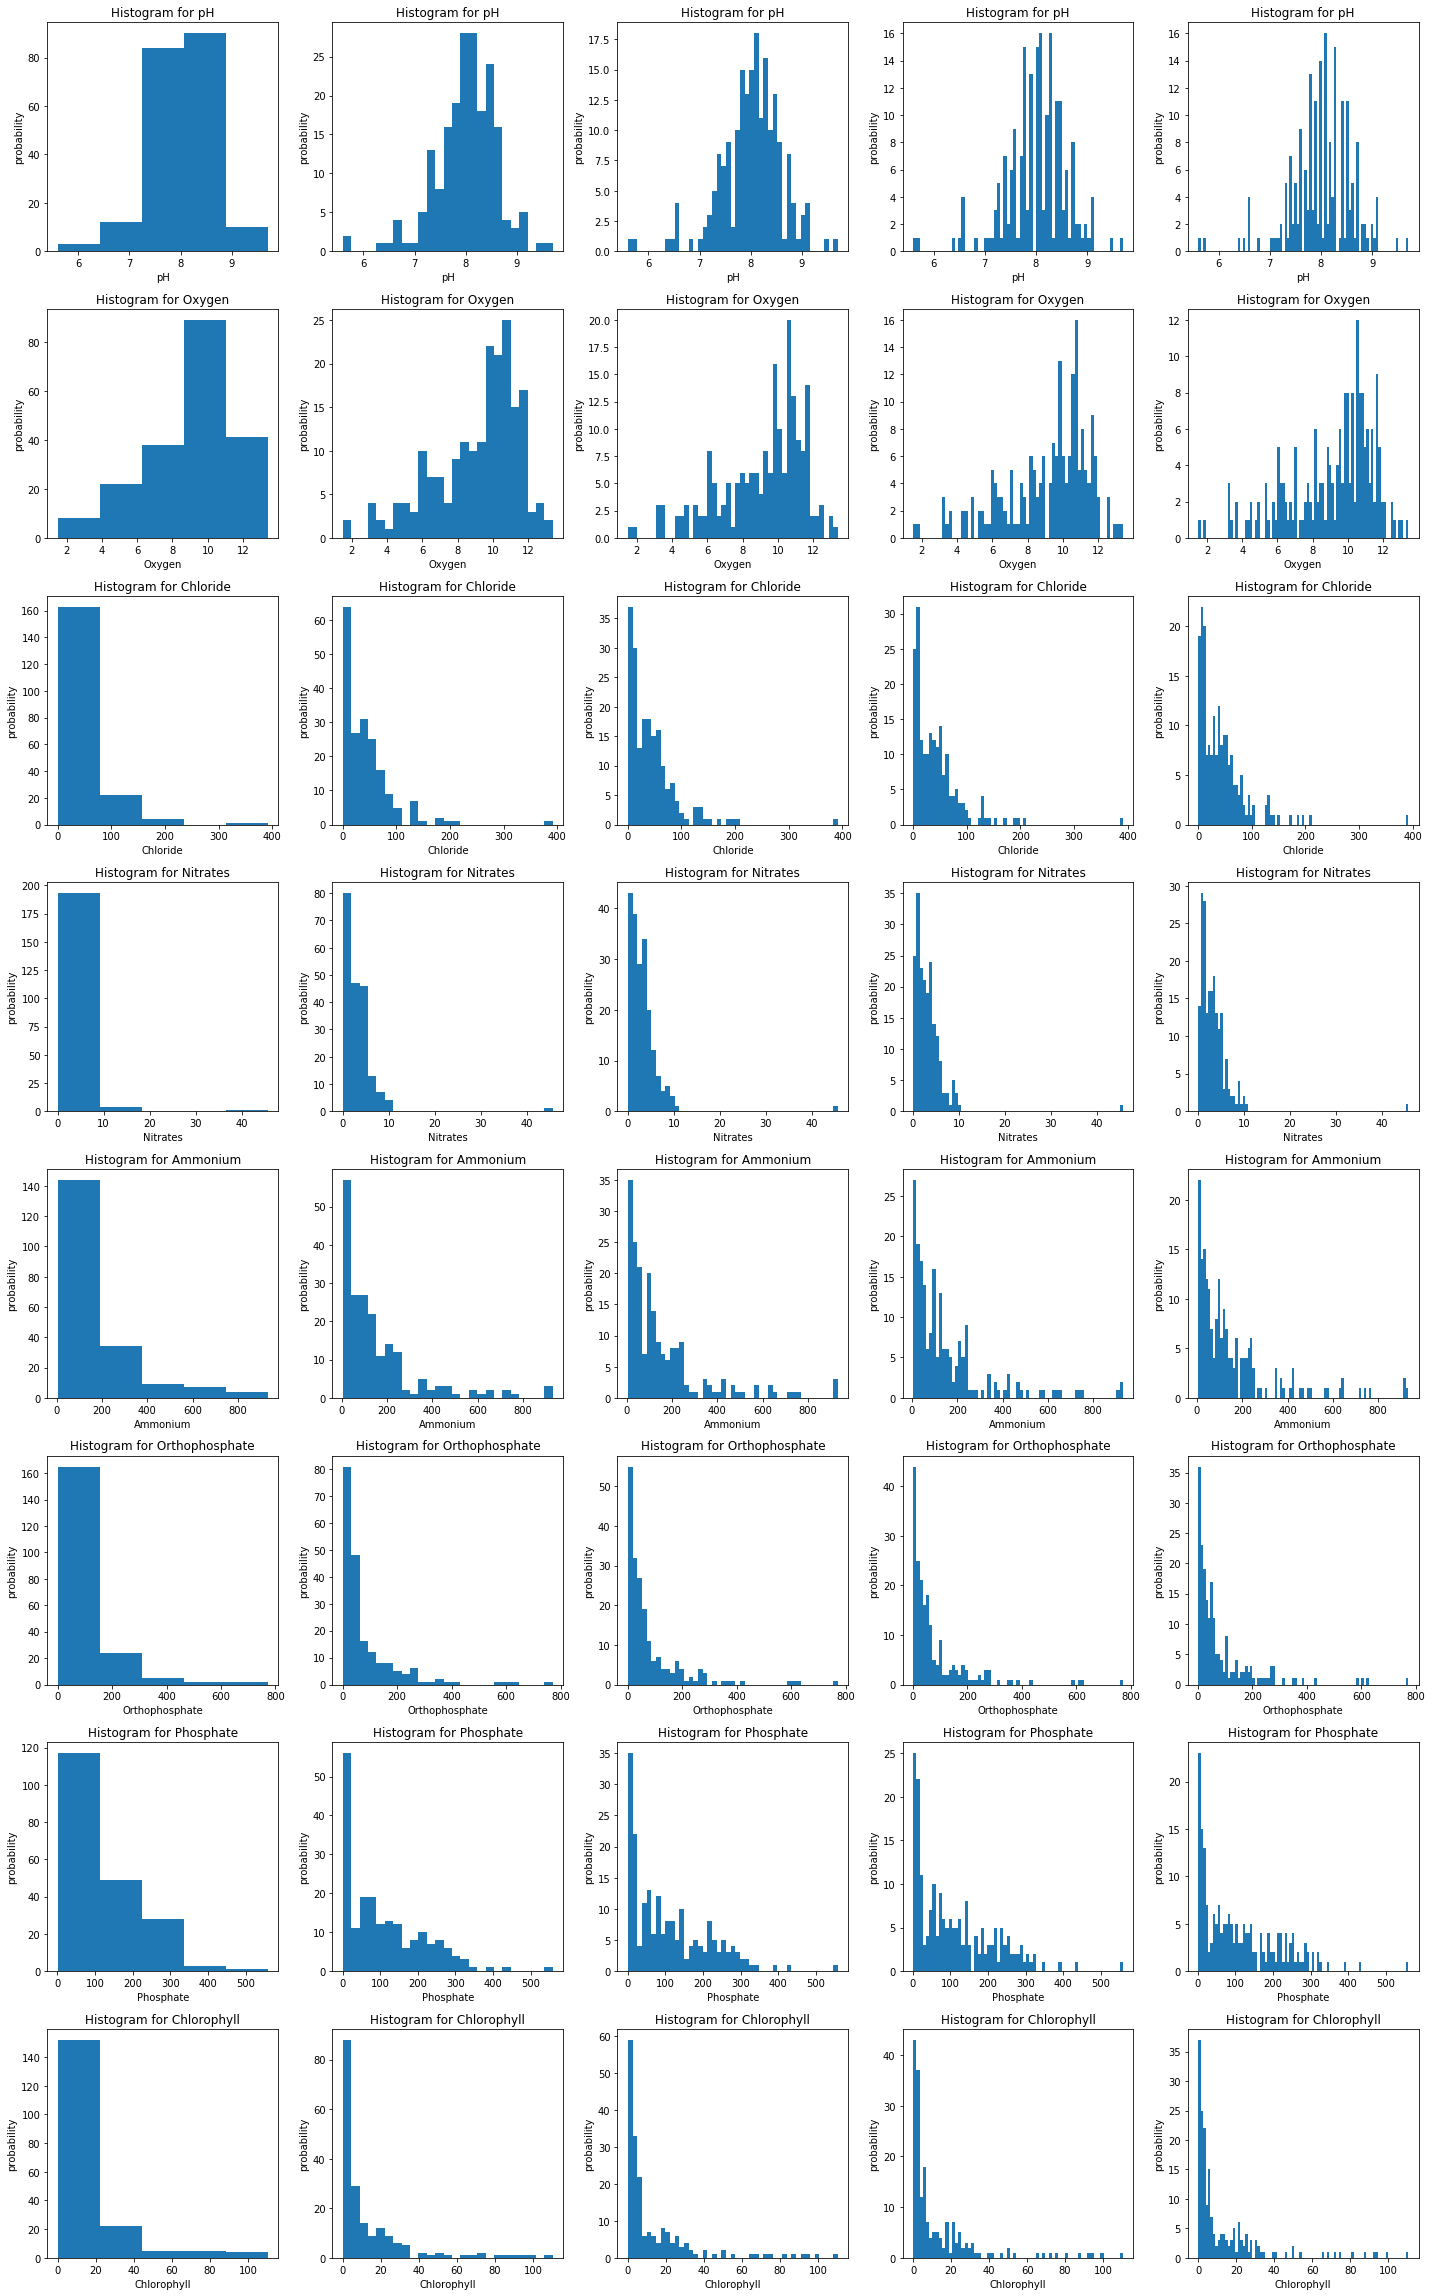

In [48]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(data[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

In [49]:
#  Considering the algae dataset
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('../../data/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
data.shape
# 1 How many instances?
len(data)

200

In [50]:
# 2 How many attributes? And for each type?
data.shape

# 11 attributes



(200, 11)

In [51]:
data.dtypes

# 8 floats64 and 3 objects

pH                float64
Oxygen            float64
Chloride          float64
Nitrates          float64
Ammonium          float64
Orthophosphate    float64
Phosphate         float64
Chlorophyll       float64
fluid_velocity     object
river_depth        object
season             object
dtype: object

In [52]:
# 3 Explore the variable season.

data['season']


date
2018-09-30    autumn
2018-10-05    autumn
2018-10-07    autumn
2018-10-09    autumn
2018-10-11    autumn
2018-10-13    autumn
2018-10-15    autumn
2018-10-17    autumn
2018-10-19    autumn
2018-10-21    autumn
2018-10-23    autumn
2018-10-25    autumn
2018-10-27    autumn
2018-10-29    autumn
2018-10-31    autumn
2018-11-02    autumn
2018-11-04    autumn
2018-11-06    autumn
2018-11-08    autumn
2018-11-10    autumn
2018-11-12    autumn
2018-11-14    autumn
2018-11-16    autumn
2018-11-18    autumn
2018-11-20    autumn
2018-11-22    autumn
2018-11-24    autumn
2018-11-26    autumn
2018-11-28    autumn
2018-11-30    autumn
               ...  
2019-07-21    summer
2019-07-23    summer
2019-07-25    summer
2019-07-27    summer
2019-07-29    summer
2019-07-31    summer
2019-08-02    summer
2019-08-04    summer
2019-08-06    summer
2019-08-08    summer
2019-08-10    summer
2019-08-12    summer
2019-08-14    summer
2019-08-16    summer
2019-08-18    summer
2019-08-20    summer
2019-08-

In [53]:
#    A What is its type?
#      object

#    B What is its domain?, domain = 2018-08-30 to 2019-09-17
print(att,data[att].unique())


season ['autumn' 'winter' 'spring' 'summer']


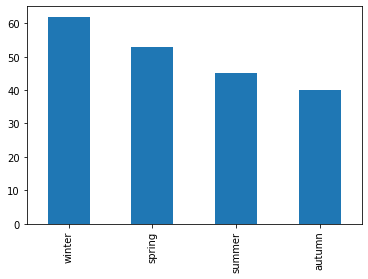

In [54]:
data.season.value_counts().plot(kind='bar')

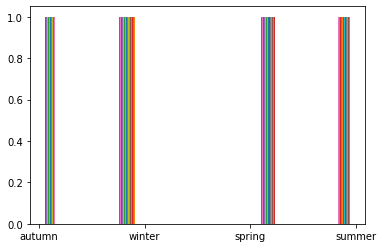

In [55]:
#    C At what granularity? Is it enough?
columns = data.select_dtypes(include='number').columns
plt.figure()
plt.hist(data['season'].dropna().values, bins = 5)
fig.tight_layout()
plt.show()
#    D Explore its distribution.

In [56]:
# 4 Explore the pH variable.
#    A What is its type?
#    B What is its domain and range?
#    C How many missing values?
#    D How is its distribution?
#    E What about outliers?

In [57]:
data.

SyntaxError: invalid syntax (<ipython-input-57-a4aa780eaf33>, line 1)

In [ ]:
data['pH']

In [ ]:
# type = float64

In [ ]:
print(att,data['pH'].unique())

In [ ]:
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

In [ ]:
minmax(data['pH'])  # = range

In [ ]:
data.Chloride.isna().value_counts().plot(kind="bar")

In [ ]:
vals = data.Chloride.isna().value_counts().values

In [ ]:
plt.bar([0, 1],vals)

In [ ]:
fig = plt.figurefig = plt.figure(figsize=(10,7))
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
    bar_chart(plt.gca(), mv.keys(), mv.values(), 'Number of missing values per variable', var, 'nr. missing values')
fig.tight_layout()
plt.show()

In [ ]:
import seaborn as sns, numpy as np
sns.distplot(data['pH'], norm_hist=True)